<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-41/blob/main/Semana4_actividad1_Equipo41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<br>
<p align=center>Instituto Tecnológico y de Estudios Superiores de Monterrey</p>
<p align=center>Escuela de Ingeniería y Ciencias</p>
<p align=center>
<br>
<img src="https://github.com/PosgradoMNA/actividades-del-projecto-equipo-41/blob/main/tec.png?raw=true" alt="Logo" width="250"/>
</p>
<br>
<p align=center>Maestría en Inteligencia Artificial Aplicada (MNA)</p>
<p align=center>TC4029. Ciencia y Analítica de Datos</p>
<p align=center>Actividad semana 4</p>
<p align=center>Profesor Titular: Jobish Vallikavungal Devassia </p>
<br>
<p align=center>Presentan:</p>
<p align=center>A01150742 | José Ovalle Alvarado</p>
<p align=center>A01793023 | Jorge Luis Arroyo Chavelas</p>
<p align=center>11 de Octubre de 2022</p>
<br>

---

# Parte 1. Ejercicio guiado

## 1.0 Preparación de datos

Llamamos algunas librerias que vamos a necesitar para el ejercicio.

In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

%matplotlib inline


Veamos las variables del dataset

In [2]:
# Get data from proposed dataset
info_url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt'
response = requests.get(info_url)
open("dataset_info.txt", "wb").write(response.content)
info_path = './dataset_info.txt'

# opening the file:
with open(info_path, "r") as f:
  # Get it as list, we want to skip a few and just get the good stuff
  file_stuff = f.readlines()[8:16]
  for i in file_stuff:
    print(i)

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statem

Revisamos los datos, con algunas correcciones que ya conociamos por el  ejercicio anterior

In [3]:
# path to file
data_path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

# colnames
colnames = ["ID", "credit_amt", "gender", "education", "marital_status", "age", "pay_stat_sep", "pay_stat_aug", "pay_stat_jul", "pay_stat_jun", "pay_stat_may", "pay_stat_apr", "bill_amt_sep", "bill_amt_aug", "bill_amt_jul", "bill_amt_jun", "bill_amt_may", "bill_amt_apr", "pay_amt_sep", "pay_amt_aug", "pay_amt_jul", "pay_amt_jun", "pay_amt_may", "pay_amt_apr", "proba_def"]

# read csv
df = pd.read_csv(data_path, names=colnames, skiprows=1)

# let's drop null values (42 rows / 30,000)
df = df[~df.isnull().any(axis=1)]

# let's also drop the ID row
df = df.drop(['ID'], axis = 1)

df



,credit_amt,gender,education,marital_status,age,pay_stat_sep,pay_stat_aug,pay_stat_jul,pay_stat_jun,pay_stat_may,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,proba_def
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Ahora veamos los datos:

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_amt,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
gender,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
education,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
marital_status,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
age,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
pay_stat_sep,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
pay_stat_aug,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
pay_stat_jul,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
pay_stat_jun,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
pay_stat_may,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


## 1.1 Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos



Para contestar este ejercicio haremos un ejercicio con los datos númericos buscando explicar al menos el 80% de los datos bajo una regla de criterio de Pareto (80-20).
Primero debemos tomar únicamente los valores númericos. El dataset que estamos utilizando incluye algunos que no son númericos sino categóricos: 
* Gender
* Education
* Marital Status

También tenemos algunos datos ordinales relativos a si se efectuó el pago o no; en sentido estricto, no son númericos realmente y aunque comparables no podemos hacer operaciones matemáticas con ellos (o no deberíamos), estos son:
* pay_stat_sep
* pay_stat_aug
* pay_stat_jul
* pay_stat_jun
* pay_stat_may
* pay_stat_apr

Además la variable objetivo que es la probabilidad de inpago no deberia considerarse como un atributo.

Con esto conformamos un conjunto df_pca como sigue:

In [5]:
df_numeric = df.drop(['gender', 'education', 'marital_status', 'pay_stat_sep', 'pay_stat_aug', 'pay_stat_jul', 'pay_stat_jun', 'pay_stat_may', 'pay_stat_apr', 'proba_def'], axis=1)
df_numeric

,credit_amt,age,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


Aplicaremos un escalamiento por z-score para que todos los datos se encuentren normalizados

In [6]:
# init transform
scaled_features = StandardScaler()

# fit transform data
scaled_values = scaled_features.fit_transform(df_numeric.values)

# move transformed data to a dataframe
df_scaled = pd.DataFrame(scaled_values,  index=df_numeric.index, columns=df_numeric.columns)
print(df_scaled.shape)
df_scaled

(29958, 14)


,credit_amt,age,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404240,0.381647,1.869050,2.016773,2.325211,0.694875,-0.149477,-0.384512,0.171131,0.610450,-0.012796,-0.113733,0.012988,-0.237269
29996,-0.135321,0.815761,-0.672765,-0.665250,-0.627383,-0.532915,-0.577704,-0.652714,-0.231017,-0.104084,0.213973,-0.299878,-0.314124,-0.293485
29997,-1.060283,0.164590,-0.647220,-0.643793,-0.638106,-0.348043,-0.324651,-0.327833,-0.341890,-0.257018,0.952008,-0.040181,-0.183279,-0.119217
29998,-0.674882,0.598704,-0.717937,0.409753,0.421878,0.147516,-0.468128,0.168744,4.842633,-0.109159,-0.229915,-0.185244,3.150905,-0.192072


Ahroa observamos la correlación entre las variables

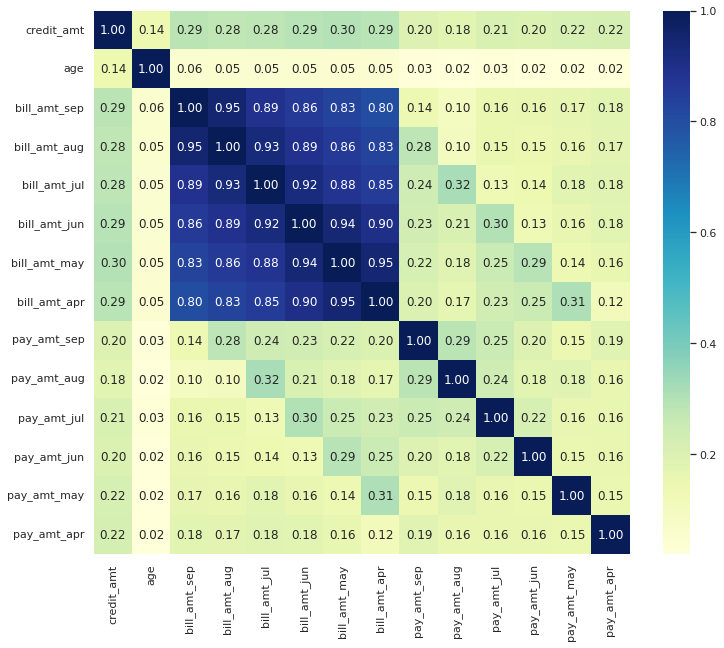

In [7]:
# Correlation matrix
corr_matrix = df_scaled.corr()

# A little bigger canvas
sns.set(rc = {'figure.figsize':(12,10)})

# Heamap of correlation
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

Esto ya por si mismo nos sugiere que es probable se pueda hacer una reducción en base a los estados de cuentas de otros meses, esto parece intuitivo, toda vez que el estado de cuenta de un mes parte desde el estado de cuenta del mes anterior +/- los movimientos. Sin embargo, existen otros montos interesantes que tienen también que ver que podrían resultar en nuestro intento de PCA. Procedamos:

In [8]:
pca = PCA()
pca_data = pca.fit_transform(df_scaled)

pcSummary = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of variance': pca.explained_variance_ratio_,
    'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
})

pcSummary.insert(loc=0, column = 'PC', value = 'PC' + ( 1 + pcSummary.reset_index().index).astype(str))

pcSummary


,PC,Standard deviation,Proportion of variance,Cumulative proportion
0,PC1,2.432921,0.422779,0.422779
1,PC2,1.309882,0.122552,0.545331
2,PC3,1.022269,0.074643,0.619974
3,PC4,0.961876,0.066084,0.686058
4,PC5,0.940087,0.063124,0.749182
5,PC6,0.934241,0.062341,0.811523
6,PC7,0.882984,0.055688,0.867211
7,PC8,0.852438,0.051902,0.919113
8,PC9,0.841041,0.050523,0.969636
9,PC10,0.514249,0.018889,0.988525


In [9]:
((pcSummary.iloc[5][3])*100).round(2)

81.15

Aquí observamos que si utilizamos 6 componentes podemos capturar hasta un 81.15% de las observaciones. Veamos esto en un gráfico de Pareto con la suma acumulada.

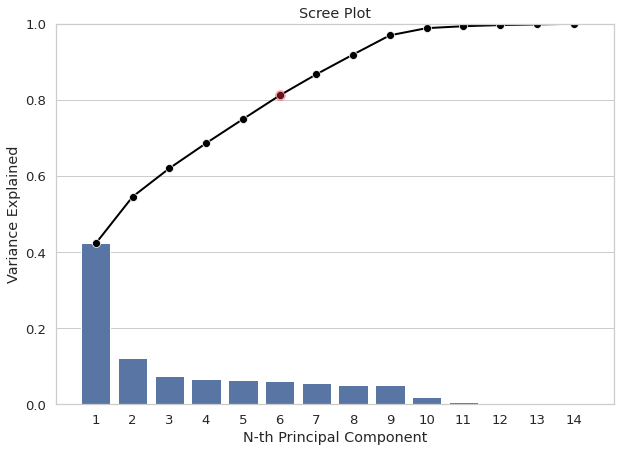

In [10]:
_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = np.arange(pca.n_components_) + 1, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = np.arange(pca.n_components_), 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )


_ = sns.lineplot(x = np.arange(pca.n_components_), 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 linewidth = 0, 
                 markeredgecolor='red',
                 marker = 'o', 
                 alpha=0.3,
                 markeredgewidth=5,
                 markevery=[5],
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


## 1.2 Interprete cada componente principal en términos de las variables originales

In [11]:
pca_data = pd.DataFrame(pca.components_.transpose(),
             columns = pcSummary['PC'].values,
             index = df_scaled.columns
             )
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
credit_amt,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883,0.111239,-0.046381,-0.821996,-0.029201,-0.006198,0.015697,-0.000417,0.003345
age,0.032789,0.071906,-0.869471,0.338990,-0.039760,0.071461,-0.078816,0.027368,0.330346,-0.009011,0.000139,-0.001377,0.000132,0.001067
bill_amt_sep,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987,0.008169,0.009341,0.010348,0.566716,0.416018,-0.432992,-0.183793,-0.316576
bill_amt_aug,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824,-0.032444,-0.135636,0.016872,0.386872,0.038425,0.345052,0.329467,0.645227
bill_amt_jul,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239,-0.121162,0.093077,-0.018607,0.122863,-0.484776,0.495792,-0.086466,-0.527640
bill_amt_jun,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527,0.126494,0.039157,0.019109,-0.205260,-0.523211,-0.489647,-0.362078,0.346095
bill_amt_may,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290,-0.007584,0.049781,0.023701,-0.419992,0.068372,-0.249500,0.718388,-0.226667
bill_amt_apr,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272,0.007892,-0.000282,0.058701,-0.488861,0.513313,0.338689,-0.427734,0.072287
pay_amt_sep,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574,-0.201646,-0.748694,0.019949,-0.056581,0.047513,-0.069359,-0.044841,-0.084567
pay_amt_aug,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361,-0.278835,0.578491,-0.110712,0.050854,0.147307,-0.068851,0.038925,0.124894


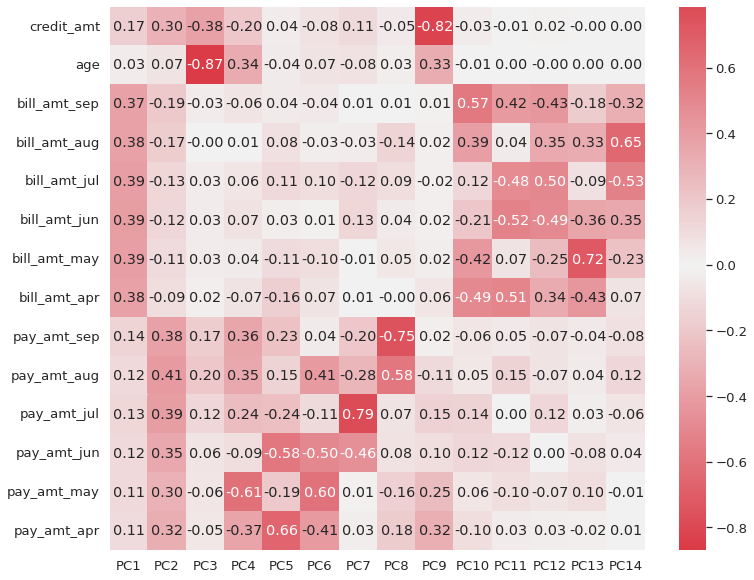

In [12]:
sns.heatmap(pca_data, annot=True, fmt='.2f', center=0, cmap=sns.diverging_palette(10, 10, as_cmap=True))

Observamos que PCA1 está influcenciado por el bill amount; es decir cuanto debe mes sobre mes, el PCA2 está influcenciado por los montos de pago, el tercer componente responde a edad, PCA9 responde al monto de crédito. Los otros componentes (3:7) responde a combinaciones de los pagos, mientras que del 10 al 14 responde a montos en el estado de cuenta.

Esto es interesante pues para un 80% de explicación, sugerimos utilizar los 6 primeros coponentes. Esto es, podemos explicar generando los PCA:

* PC1: ▲ Estado de cuenta de los 6 meses
* PC2: ▲ Monto de pago de los 6 meses
* PC3: ▼ La edad
* PC4: ▲ (pago Septiembre) - ▼ (pago mayo)
* PC5: ▲ (pago abril) ▼ (pago Junio)
* PC6: ▲ (pago mayo) ▼ (pago junio)

(Julio es el principal factor en PC7)

## 1.3 Identifique valores atípicos

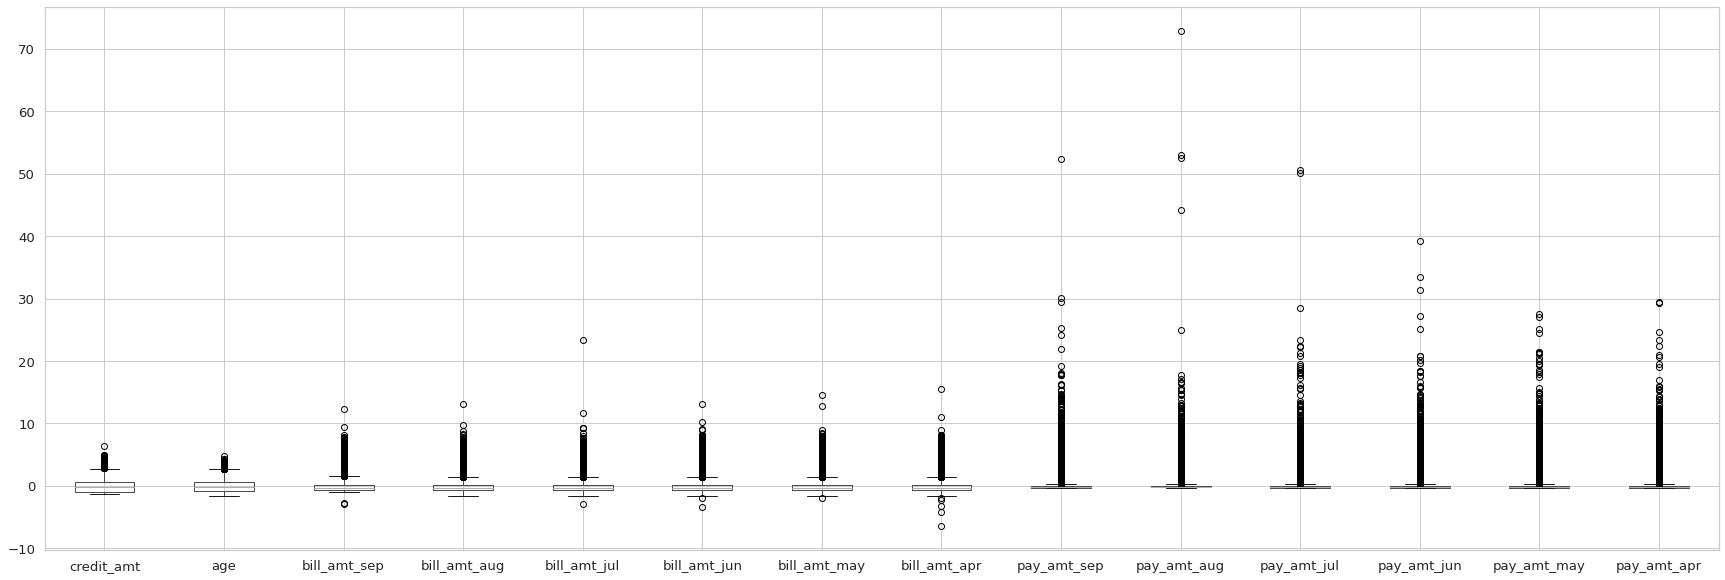

In [15]:
df_scaled.boxplot(figsize=(30, 10))

Todas las variables presenta datos atípicos, esto es normal, ya que aparecen datos de diferentes personas, se sugiere utilizar min-max scaler para obtener un mejor ajuste hacia encontrar datos atípicos.

# Parte 2. Responde las siguientes preguntas

## 2.1 ¿Cuál es el número de componentes mínimo y por qué?
El número mínimo de componentes puede ser 1 o 2, sin embargo no se capturaría suficiente variación de los datos; esto seria útil para realizar construcciones de grupos pero se perdería una cantidad significativa de información en el proceso. Para un análisis de datos, se recomienda seguir un criterio de pareto 80 - 20 para capturar una cantidad aceptable información y con pocos componentes principales.

## 2.2 ¿Cuál es la variación de los datos que representan esos componentes?

Con 6 componentes se capturaria el 80% - 81% de la variacion. En estos componentes estamos capturando el estado de cuenta, la edad y los pagos en las diferentes relaciones descritas en la matriz construida.


## 2.3 ¿Cuál es la pérdida de información después de realizar PCA?

La perdida de información es de alrededor de un 20%. El componente 7 que corresponde a los pagos de julio es un ejemplo de esta perdida de informacion, ya que no es capturada dentro de los 6 componentes principales sugeridos.

## 2.4 De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

Los estados de cuenta analizados en y como conjunto con los pagos realizados son las variables más importantes y las menos importantes son las variables analizadas de forma individual.

## 2.5 ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

En problemas o modelos complejos se puede reducir el tiempo computacional, también es muy efectivo para realizar agrupación y realizar nuevos análisis. También puede servir para reducir variables con alta covarianza. Un ejemplo de ellos es ventas y utilidad o margen de ganancia, ya que van en el mismo sentido y con una correlación alta positiva.